# 1. Introduction


In [ ]:
pip install keras

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical



# 2. Data preparation
## 2.1 Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Copy of train.csv')
test = pd.read_csv('/content/drive/MyDrive/Copy of test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Copy of sample_submission.csv')

In [ ]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


**Set data features and labels**

In [ ]:
X = train.drop(columns=['label']).values
y = train['label'].values
y.reshape((42000,1))

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

## 2.2 Normalization

The activation values of X range from 0 to 255.
Normalize them to have a range of 0 to 1



In [ ]:
X = X/255.0

## 2.3 Reshape

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
# desired X.shape = (42000, 28, 28, 1)
X = X.reshape((42000,28,28,1))


## 2.4 Label encoding

**One-Hot Encoding**

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y =to_categorical(y,num_classes=10)
# previous y.shape = (42000, 1)

print(f"Label size {y.shape}")

Label size (42000, 10)


Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

## 2.5 Split training and valdiation set

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

**Data Visualization**

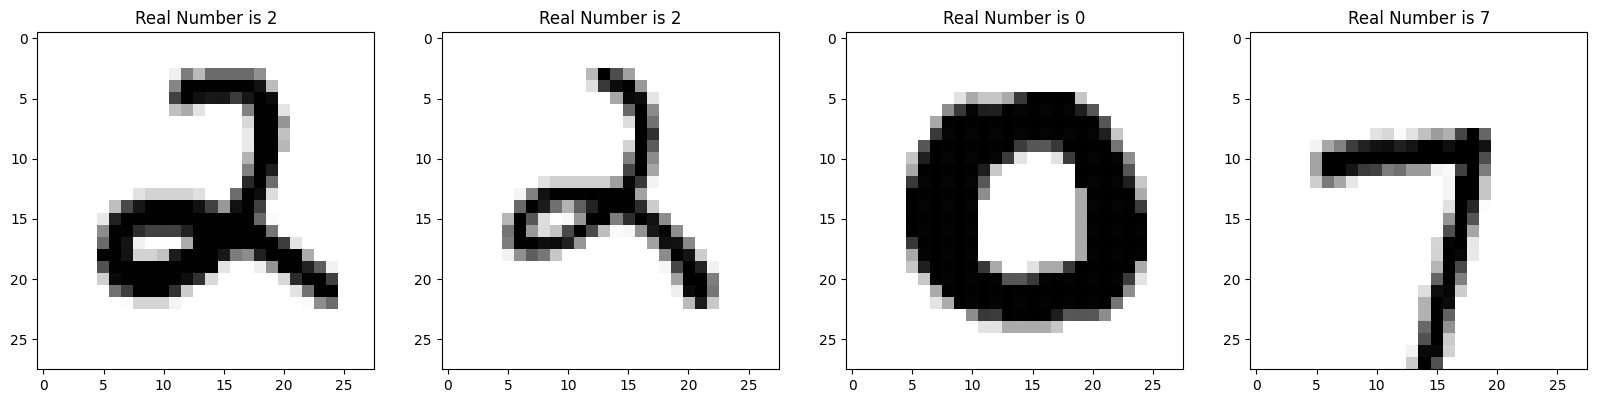

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

**Normalization**

In [ ]:
mean = np.mean(X_train)

std = np.std(X_train)

def standardize(x):
    return (x-mean)/std # Normalize x using mean and std

# 3. CNN
## 3.1 Define the model

**Model Definition**

In [ ]:


model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

## 3.3 Model training

In [ ]:
model.fit(X, y, batch_size=128, validation_split=0.2, epochs=15)
# Number of images in X = 42000
# Validation split = 20%, so the number of images undergoing training = 80% * 42000 = 33600 = 263 * 128

Epoch 1/15
263/263 [==============================] - 10s 19ms/step - loss: 0.1041 - accuracy: 0.9684 - val_loss: 4.4393 - val_accuracy: 0.1131
Epoch 2/15
263/263 [==============================] - 3s 13ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.0842 - val_accuracy: 0.9742
Epoch 3/15
263/263 [==============================] - 3s 13ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0840 - val_accuracy: 0.9770
Epoch 4/15
263/263 [==============================] - 4s 16ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0629 - val_accuracy: 0.9855
Epoch 5/15
263/263 [==============================] - 3s 13ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0623 - val_accuracy: 0.9851
Epoch 6/15
263/263 [==============================] - 3s 13ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0481 - val_accuracy: 0.9883
Epoch 7/15
263/263 [==============================] - 4s 15ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.0583 - val_accuracy: 0.986

## 4.2 Confusion matrix

132/132 [==============================] - 1s 5ms/step


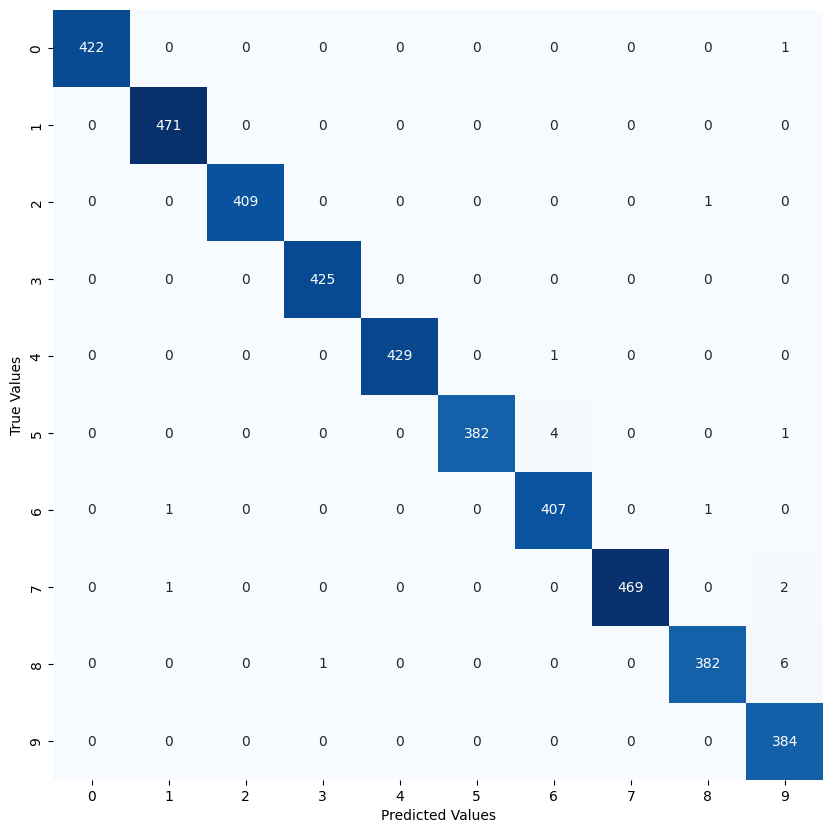

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# 5. Prediction and submission




## 5.1 Prediction validation results

132/132 [==============================] - 0s 2ms/step


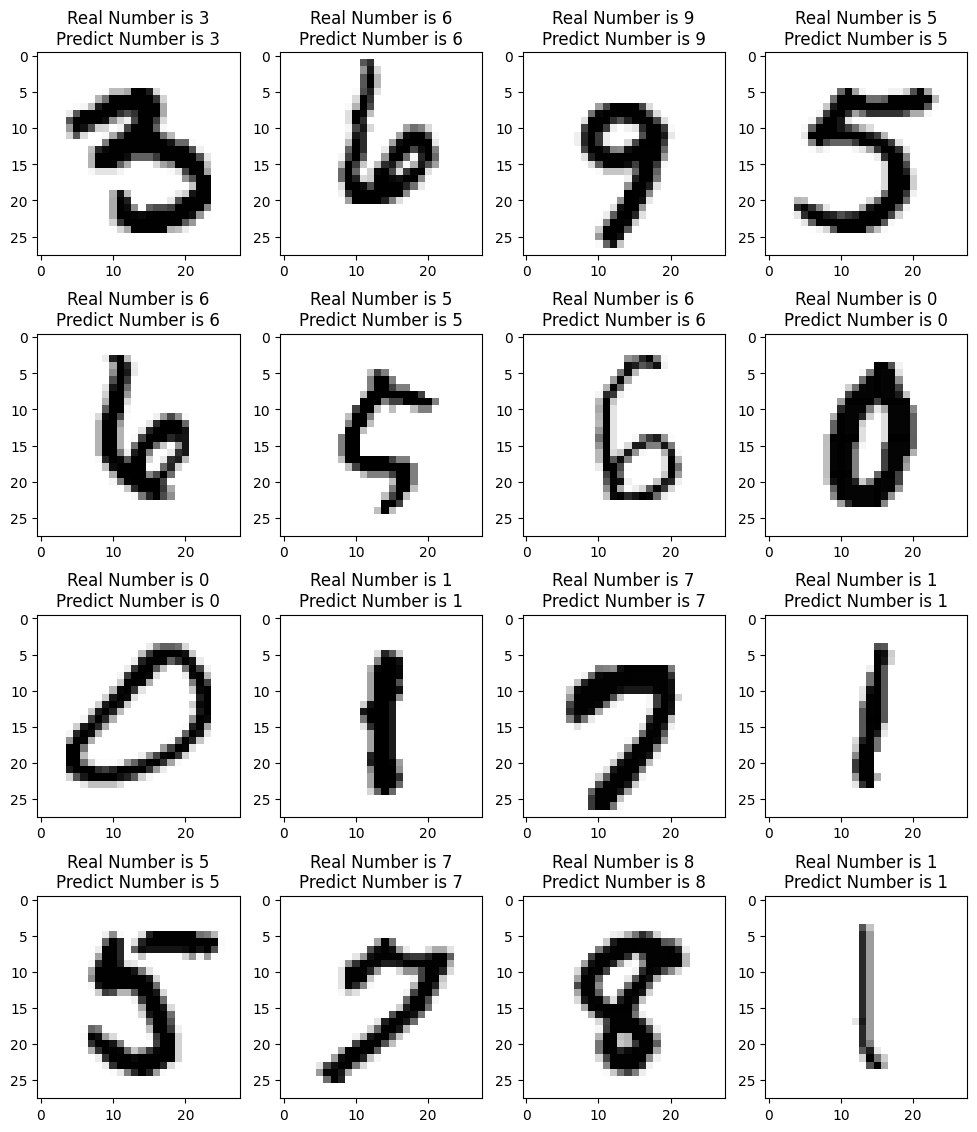

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       473
           2       1.00      1.00      1.00       409
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00       429
           5       0.99      1.00      0.99       382
           6       1.00      0.99      0.99       412
           7       0.99      1.00      1.00       469
           8       0.98      0.99      0.99       384
           9       1.00      0.97      0.99       394

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

